In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [2]:
df = pd.read_csv('../data/base.csv')
os.makedirs('images',exist_ok=True)

In [3]:
df.columns

Index(['MonthlyDebtPayments', 'LoanAmount', 'NetWorth', 'CreditScore',
       'CheckingAccountBalance', 'BankruptcyHistory', 'LoanDuration',
       'EducationLevel', 'UtilityBillsPaymentHistory', 'TotalLiabilities',
       'MaritalStatus', 'LengthOfCreditHistory', 'AnnualIncome',
       'HomeOwnershipStatus', 'PreviousLoanDefaults',
       'CreditCardUtilizationRate', 'PaymentHistory', 'TotalAssets',
       'EmploymentStatus', 'SavingsAccountBalance', 'Age',
       'NumberOfCreditInquiries', 'JobTenure', 'DebtToIncomeRatio',
       'LoanApproved', 'NumberOfOpenCreditLines', 'LoanPurpose',
       'InterestRate', 'NumberOfDependents'],
      dtype='object')

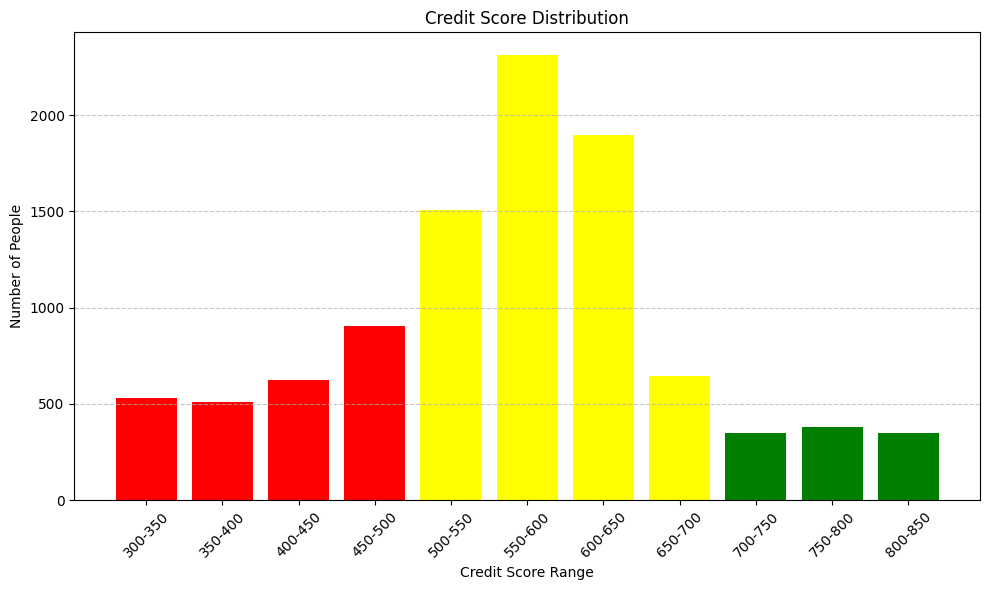

In [4]:
# Define bins and labels
bins = np.arange(300, 851, 50)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Bin the CreditScore data
df['CreditScoreBin'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

# Count the number of people in each bin
score_counts = df['CreditScoreBin'].value_counts().sort_index()

# Define bar colors based on bin ranges
colors = ['red' if int(label.split('-')[0]) < 500 else 
          'yellow' if int(label.split('-')[0]) < 700 else 
          'green' for label in labels]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(score_counts.index, score_counts.values, color=colors)

# Customizing the plot
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("./images/fig1.png")
plt.show()

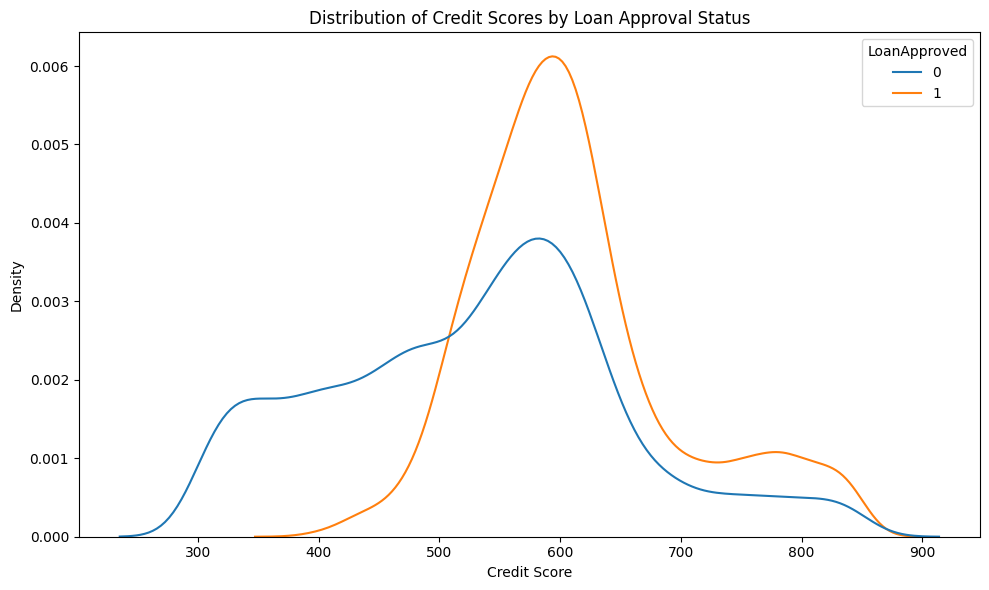

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='CreditScore', hue='LoanApproved', common_norm=False)
plt.title('Distribution of Credit Scores by Loan Approval Status')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('images/fig2.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

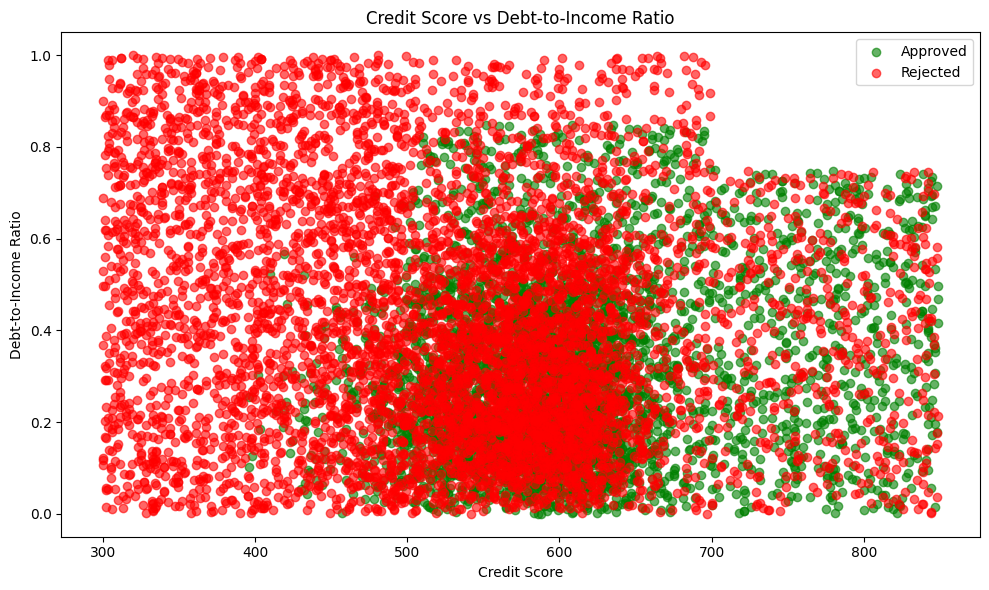

In [6]:
plt.figure(figsize=(10, 6))
approved = df[df['LoanApproved'] == 1]
rejected = df[df['LoanApproved'] == 0]

plt.scatter(approved['CreditScore'], approved['DebtToIncomeRatio'], 
           alpha=0.6, label='Approved', c='green')
plt.scatter(rejected['CreditScore'], rejected['DebtToIncomeRatio'], 
           alpha=0.6, label='Rejected', c='red')
plt.xlabel('Credit Score')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Credit Score vs Debt-to-Income Ratio')
plt.legend()
plt.tight_layout()
plt.savefig('images/fig3.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

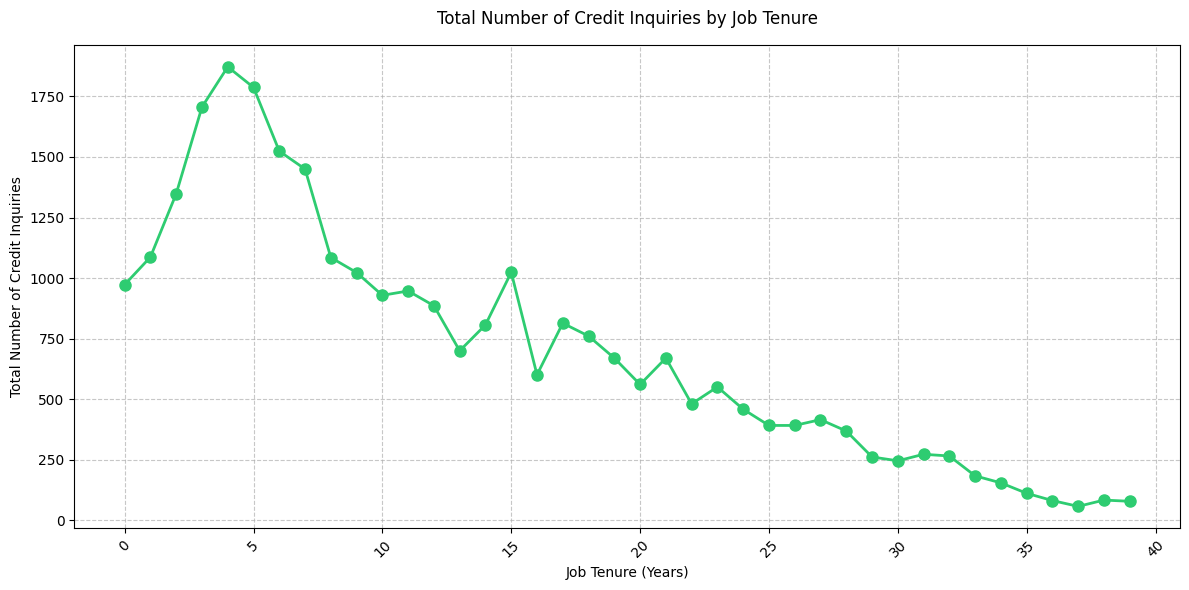

In [7]:
# Group by JobTenure and sum the NumberOfCreditInquiries
tenure_inquiries = df.groupby('JobTenure')['NumberOfCreditInquiries'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(tenure_inquiries['JobTenure'], 
         tenure_inquiries['NumberOfCreditInquiries'], 
         marker='o',  # Add markers at each data point
         linewidth=2, 
         markersize=8,
         color='#2ecc71')  # Use a nice green color

# Customize the plot
plt.title('Total Number of Credit Inquiries by Job Tenure', fontsize=12, pad=15)
plt.xlabel('Job Tenure (Years)', fontsize=10)
plt.ylabel('Total Number of Credit Inquiries', fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add value labels on top of each point
# for x, y in zip(tenure_inquiries['JobTenure'], tenure_inquiries['NumberOfCreditInquiries']):
#     plt.text(x, y + 0.5, f'{int(y)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('./images/fig4.png')
plt.show()

/tmp/ipykernel_1932/718637541.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['AgeGroup', 'CreditScoreCategory'])['NumberOfCreditInquiries'].sum().unstack()


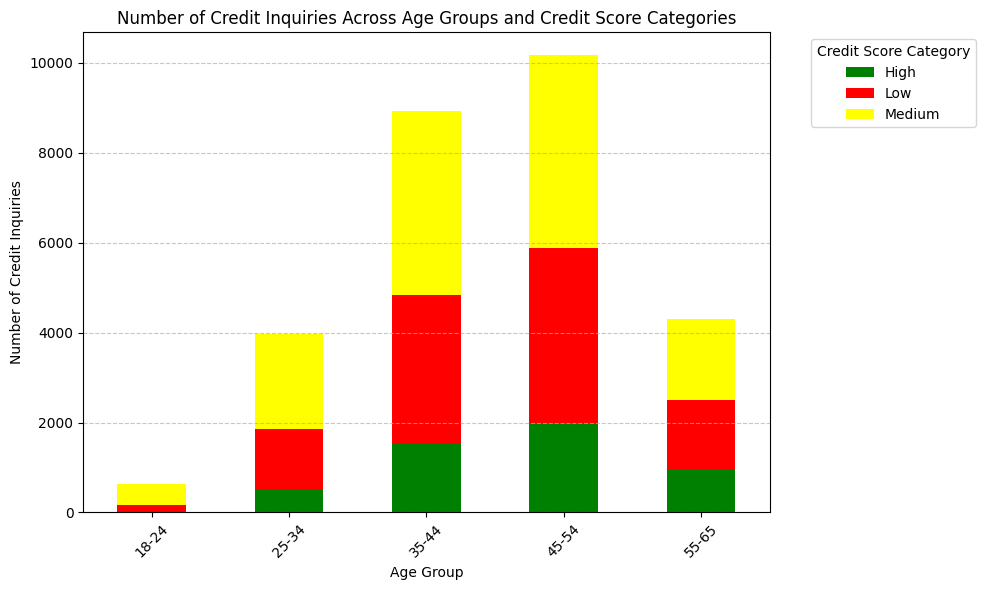

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins for AgeGroup
bins = [18, 25, 35, 45, 55, 66]
labels = ['18-24', '25-34', '35-44', '45-54', '55-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Categorize Credit Score
def categorize_credit_score(score):
    if score < 500:
        return 'Low'
    elif score < 700:
        return 'Medium'
    else:
        return 'High'

df['CreditScoreCategory'] = df['CreditScore'].apply(categorize_credit_score)

# Group by AgeGroup and CreditScoreCategory, summing NumberOfCreditInquiries
grouped_data = df.groupby(['AgeGroup', 'CreditScoreCategory'])['NumberOfCreditInquiries'].sum().unstack()

# Define colors for categories
colors = {'Low': 'red', 'Medium': 'yellow', 'High': 'green'}

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in grouped_data.columns])

# Customizing the plot
plt.title('Number of Credit Inquiries Across Age Groups and Credit Score Categories')
plt.xlabel('Age Group')
plt.ylabel('Number of Credit Inquiries')
plt.xticks(rotation=45)
plt.legend(title='Credit Score Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('./images/fig5.png')
# Show the plot
plt.show()


In [9]:
import pandas as pd
import plotly.express as px

# Select relevant features and preprocess
features = ['NumberOfOpenCreditLines', 'LoanApproved', 'NumberOfCreditInquiries', 'DebtToIncomeRatio']
df_pcp = df[features].copy()

# Add CreditScoreCategory for coloring
def categorize_credit_score(score):
    if score < 500:
        return 'Low'
    elif score < 700:
        return 'Medium'
    else:
        return 'High'

df_pcp['CreditScoreCategory'] = df['CreditScore'].apply(categorize_credit_score)

# Map CreditScoreCategory to numeric values for coloring
# Adjusting the numeric mapping to spread the colors more evenly
color_map = {'Low': 0, 'Medium': 0.5, 'High': 1}
df_pcp['CreditScoreNumeric'] = df_pcp['CreditScoreCategory'].map(color_map)

# Plot using Plotly with adjusted color scale
fig = px.parallel_coordinates(
    df_pcp,
    color='CreditScoreNumeric',
    dimensions=features,
    color_continuous_scale=[
        [0, 'red'],
        [0.5, 'yellow'],
        [1, 'green']
    ],
    labels={
        'NumberOfOpenCreditLines': 'Open Credit Lines',
        'LoanApproved': 'Loan Approved',
        'NumberOfCreditInquiries': 'Credit Inquiries',
        'DebtToIncomeRatio': 'Debt-to-Income Ratio',
    },
    range_color=[0, 1]  # Fix the color range explicitly
)

# Normalize all dimensions to [0,1] for consistent color display
fig.update_traces(dimensions=[
    dict(range=[0, 1], 
         values=(df_pcp['NumberOfOpenCreditLines'] - df_pcp['NumberOfOpenCreditLines'].min()) / 
                (df_pcp['NumberOfOpenCreditLines'].max() - df_pcp['NumberOfOpenCreditLines'].min()),
         label='Open Credit Lines'),
    dict(range=[0, 1], 
         values=df_pcp['LoanApproved'],
         label='Loan Approved'),
    dict(range=[0, 1], 
         values=(df_pcp['NumberOfCreditInquiries'] - df_pcp['NumberOfCreditInquiries'].min()) / 
                (df_pcp['NumberOfCreditInquiries'].max() - df_pcp['NumberOfCreditInquiries'].min()),
         label='Credit Inquiries'),
    dict(range=[0, 1], 
         values=df_pcp['DebtToIncomeRatio'],
         label='Debt-to-Income Ratio'),
])

# Show the plot
fig.show()

Explained Variance Ratio by PCA Components: [0.41325368 0.23210409]
Model Performance:
Mean Squared Error (MSE): 11361.22
Mean Absolute Error (MAE): 81.43
R² Score: 0.18


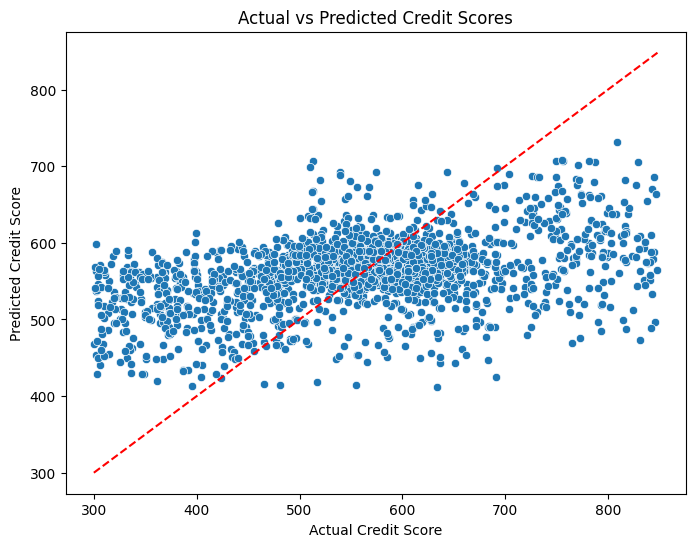

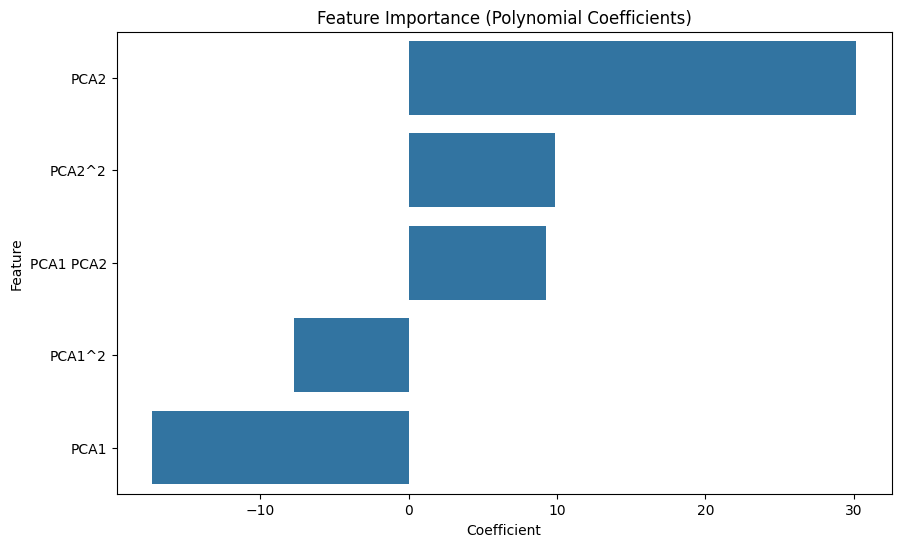

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
 
# Load the dataset
data = pd.read_csv('../data/base.csv')

# Subset relevant features
features = ['NumberOfOpenCreditLines', 'LoanApproved', 'NumberOfCreditInquiries', 'DebtToIncomeRatio']
target = 'CreditScore'

# Handle missing values (drop rows with NaNs in selected columns for simplicity)
data = data[features + [target]].dropna()

# Split into features (X) and target (y)
X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Choose the number of components to retain
X_pca = pca.fit_transform(X_scaled)
print(f"Explained Variance Ratio by PCA Components: {pca.explained_variance_ratio_}")

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_pca)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores')
plt.show()

# Feature Importance (Polynomial Coefficients)
coefficients = pd.DataFrame({'Feature': poly.get_feature_names_out(['PCA1', 'PCA2']), 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Polynomial Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_test is a DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=features)

# Reshape predicted scores for clustering
predicted_scores_reshaped = np.array(predicted_scores).reshape(-1, 1)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(predicted_scores_reshaped)

# Add predicted scores and clusters to X_test
X_test['PredictedCreditScore'] = predicted_scores
X_test['Cluster'] = clusters

# Evaluate clustering performance using Silhouette Score
sil_score = silhouette_score(predicted_scores_reshaped, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_test['PredictedCreditScore'],
    y=X_test['DebtToIncomeRatio'],
    hue=X_test['Cluster'],
    palette='viridis',
    s=50
)
plt.title('Clusters of Predicted Credit Scores')
plt.xlabel('Predicted Credit Score')
plt.ylabel('Debt-to-Income Ratio')
plt.legend(title='Cluster', loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


ValueError: Shape of passed values is (2000, 5), indices imply (2000, 4)